In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree

In [10]:
x,y = make_classification(n_features=5,n_redundant=0,n_clusters_per_class=1,n_informative=5)

In [11]:
df = pd.DataFrame(x,columns=['f1','f2','f3','f4','f5'])
df['target'] = y

In [12]:
df.head()

,f1,f2,f3,f4,f5,target
0,0.268562,-0.006610,-1.489324,-0.619121,-0.555237,0
1,-0.206229,-0.602095,0.965789,1.435032,-1.902095,1
2,-0.767372,-1.112237,-0.011420,2.316097,0.674841,1
3,-1.244899,-1.071820,-0.769837,-0.750331,-1.771647,0
4,-2.522348,-1.818996,-2.586811,-1.837618,-1.634332,0


In [14]:
bag = BaggingClassifier(max_features=2)
bag.fit(df.iloc[:,:5],df.iloc[:,-1])
cross_val_score(bag,x,y,cv=10,scoring='accuracy').mean()

0.7200000000000001

[Text(0.32211538461538464, 0.95, 'x[0] <= -2.261\ngini = 0.497\nsamples = 61\nvalue = [46, 54]'),
 Text(0.28365384615384615, 0.85, 'gini = 0.0\nsamples = 8\nvalue = [0, 9]'),
 Text(0.3028846153846154, 0.8999999999999999, 'True  '),
 Text(0.3605769230769231, 0.85, 'x[0] <= -1.761\ngini = 0.5\nsamples = 53\nvalue = [46, 45]'),
 Text(0.34134615384615385, 0.8999999999999999, '  False'),
 Text(0.07692307692307693, 0.75, 'x[1] <= -0.858\ngini = 0.346\nsamples = 12\nvalue = [14, 4]'),
 Text(0.038461538461538464, 0.65, 'gini = 0.0\nsamples = 5\nvalue = [11, 0]'),
 Text(0.11538461538461539, 0.65, 'x[0] <= -2.06\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.07692307692307693, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.15384615384615385, 0.55, 'x[0] <= -1.91\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.11538461538461539, 0.45, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.19230769230769232, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.644230769230

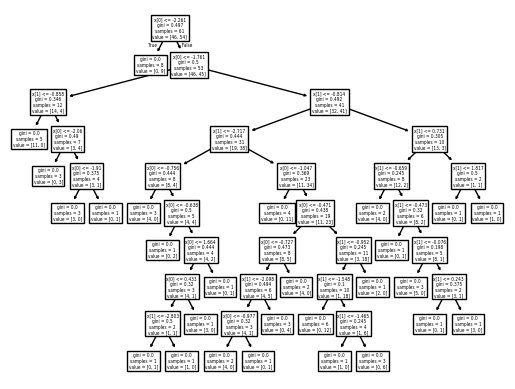

In [17]:
plot_tree(bag.estimators_[0])

In [19]:
rf = RandomForestClassifier(max_features=2)
rf.fit(df.iloc[:,:5],df.iloc[:,-1])
cross_val_score(rf,x,y,cv=10,scoring='accuracy').mean()

0.82

[Text(0.34375, 0.9285714285714286, 'x[1] <= -2.062\ngini = 0.5\nsamples = 65\nvalue = [49, 51]'),
 Text(0.1875, 0.7857142857142857, 'x[3] <= -2.04\ngini = 0.172\nsamples = 14\nvalue = [2, 19]'),
 Text(0.265625, 0.8571428571428572, 'True  '),
 Text(0.125, 0.6428571428571429, 'x[2] <= -0.079\ngini = 0.5\nsamples = 2\nvalue = [2, 2]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.25, 0.6428571428571429, 'gini = 0.0\nsamples = 12\nvalue = [0, 17]'),
 Text(0.5, 0.7857142857142857, 'x[0] <= -2.415\ngini = 0.482\nsamples = 51\nvalue = [47.0, 32.0]'),
 Text(0.421875, 0.8571428571428572, '  False'),
 Text(0.375, 0.6428571428571429, 'x[1] <= -1.054\ngini = 0.26\nsamples = 8\nvalue = [2, 11]'),
 Text(0.3125, 0.5, 'x[3] <= 0.43\ngini = 0.5\nsamples = 3\nvalue = [2, 2]'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.375, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalu

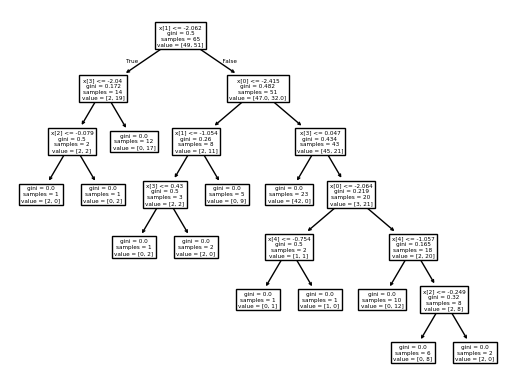

In [20]:
plot_tree(rf.estimators_[4])